### Import libraries and functions

In [229]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='vmeenaks', api_key='5s5CarWAAFqBB52t8L4J')

### Import the data and some preliminary observation

In [250]:
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The number of non-fradulent/normal transactions: 284315
The number of fradulent transactions: 492
The percentage of non-fradulent/normal transactions: 0.99827
The percentage of fradulent transactions: 0.00173


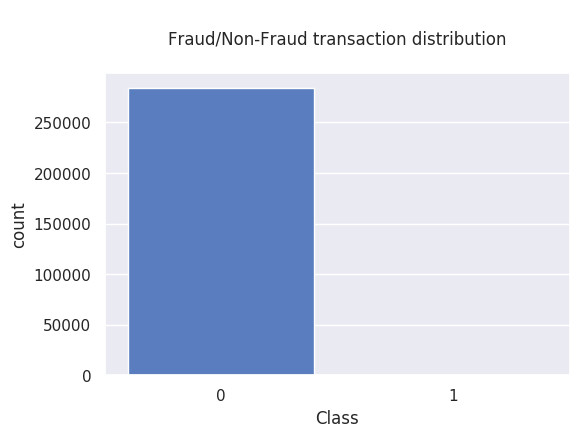

In [232]:
print("The number of non-fradulent/normal transactions:", sum(df['Class']==0))
print("The number of fradulent transactions:", sum(df['Class']))
print("The percentage of non-fradulent/normal transactions:", "{0:.5f}".format(sum(df['Class']==0)/len(df)))
print("The percentage of fradulent transactions:", "{0:.5f}".format(sum(df['Class'])/len(df)))

sns.set(style="darkgrid")
ax = sns.countplot(x = 'Class', data = df,palette="muted")
plt.title('\nFraud/Non-Fraud transaction distribution\n')
plt.show()

#### Amount Exploration

In [142]:
# check missing value - but this will only capture missing values if they are in the form of Nan
print("Are there any missing values in the form of NaN?", df.isna().values.any())

Are there any missing values in the form of NaN? False


In [141]:
print("The number of transactions with amount = 0           : ",sum(df.Amount == 0))
print("The number of fradulent transactions with amount = 0 : ", sum(df[df['Amount']==0].Class ==1))
print("The number of normal transactions with amount = 0    : ",sum(df[df['Amount']==0].Class ==0))

The number of transactions with amount = 0           :  1825
The number of fradulent transactions with amount = 0 :  27
The number of normal transactions with amount = 0    :  1798


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f920dad5668>,
      dtype=object)

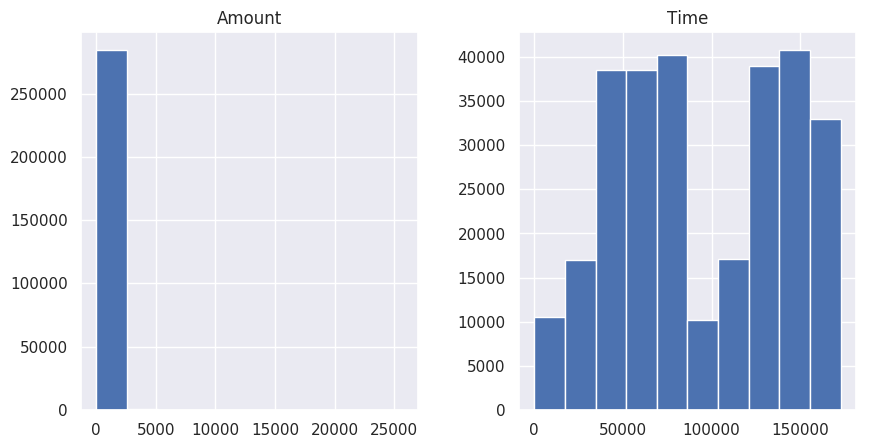

In [233]:
# check for distributions and missing values
df[['Amount', 'Time']].hist(figsize=(10,5))

/home/rstudio/.rsm-msba/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



(0.0, 25691.16)

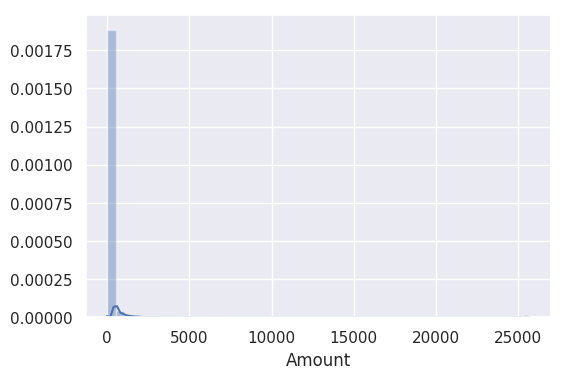

In [234]:
import seaborn as sns, numpy as np
sns.set()
sns.distplot(df['Amount'])
ax.set_xlim([min(df['Amount']), max(df['Amount'])])

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


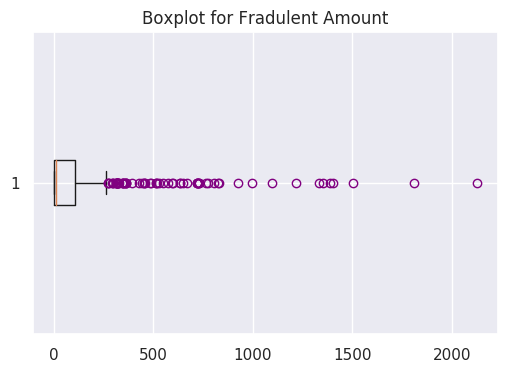

In [239]:
print(df[df['Class']==1].Amount.describe())
%matplotlib inline
plt.rcParams['figure.dpi'] = 100  #Sets the DPI for the figures for easier viewing in Python
plt.figure()
box = plt.boxplot(df[df['Class']==1].Amount, vert = False)
plt.setp(box["fliers"], markeredgecolor="purple")
plt.title("Boxplot for Fradulent Amount")
plt.show()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


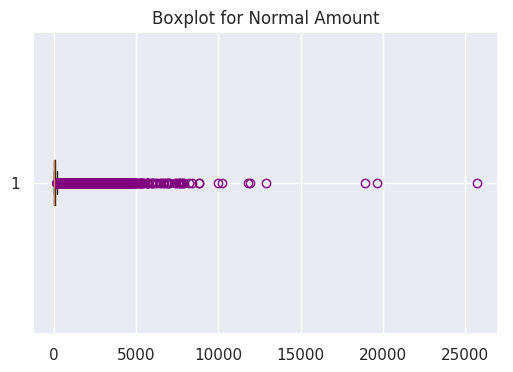

In [240]:
print(df[df['Class']==0].Amount.describe())
%matplotlib inline
plt.rcParams['figure.dpi'] = 100  #Sets the DPI for the figures for easier viewing in Python
plt.figure()
box = plt.boxplot(df[df['Class']==0].Amount, vert = False)
plt.setp(box["fliers"], markeredgecolor="purple")
plt.title("Boxplot for Normal Amount")
plt.show()

In [41]:
df.Amount.quantile(0.97)

525.3104000000016

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f921403bbe0>,
      dtype=object)

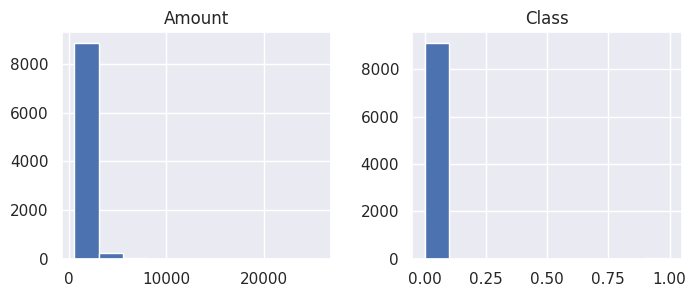

In [241]:
largeamount = df[df.Amount > 500]
largeamount[['Amount', 'Class']].hist(figsize=(8,3))

In [44]:
largeamount.shape

(9142, 31)

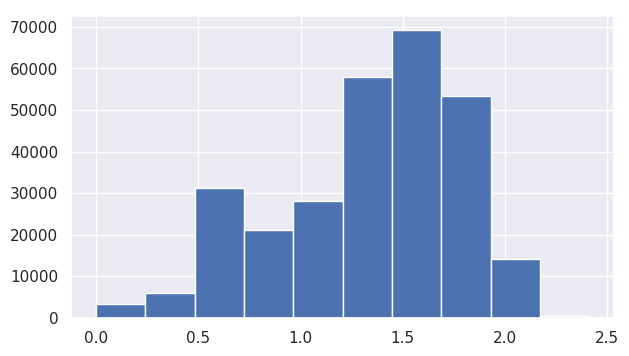

In [255]:
# log transform the transaction amount
from sklearn.preprocessing import StandardScaler
df["nAmount"] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df["NormAmount"] = np.log(df.Amount + 1)
df.NormAmount.hist(figsize=(7,4))

#### Time Exploration

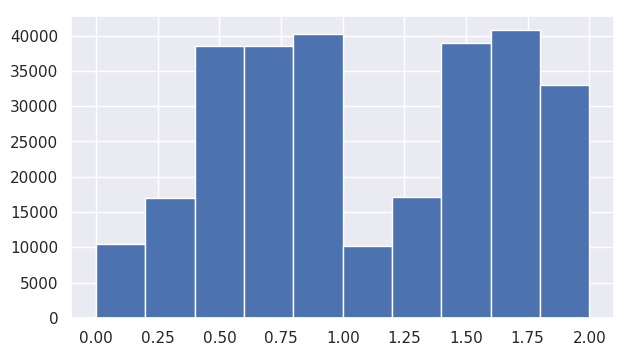

In [243]:
# covert to number of days, the maximum time elapsed is only 2 days

(df.Time/60/60/24).hist(figsize=(7,4))

#### Two - Varible Exploration

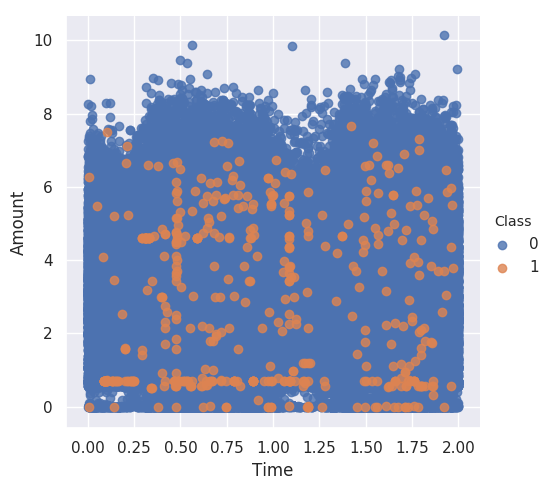

In [251]:
df2 = df
df2.Time = df2.Time/60/60/24
df2.Amount = np.log(df2.Amount + 1)
sns.lmplot('Time', 'Amount', data = df2, hue = "Class", fit_reg = False)

- There are 1,825 data with Amount of zero. Are they missing values? Shall we remove them directly as the transaction number is not supposed to be zero. No missing value is spotted on other columns. 
- Data is highly imbalanced as there are only 492 fradulent incidents among 284,807 cases;
- Transaction amount is highly skewed to the right. Among 284,807 samples, only 9,142 cases, roughly 3% of the cases, have transaction number larger than 500. Log transforming seems to fix the problem fine. 


In [306]:
## 60% train data 20% validation and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(df, test_size= 0.4, random_state=1, shuffle = True)
X_test, X_val, = train_test_split(X_test,test_size= 0.5, random_state=1, shuffle = True)

In [312]:
len(X_train[X_train["Class"]==1])

306

In [313]:
len(X_test[X_test["Class"]==1])

88

In [314]:
len(X_val[X_val["Class"]==1])

98